In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data_file_path = '../input/heart-disease-uci/heart.csv'
data_df = pd.read_csv('heart.csv')

#To get information on the number of entries and the datatypes of the features
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

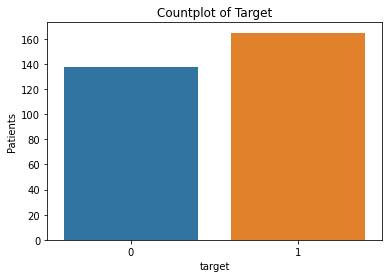

In [4]:
#2. distribution of target variable.
sns.countplot(x='target', data=data_df)

# Add labels
plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('Patients')
plt.show()

In [5]:
y = data_df['target'].values
x = data_df.drop(['target'], axis=1)

# scaling - mandatory for knn
ss = StandardScaler()
x = ss.fit_transform(x)

# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training andd 30% testing

In [6]:
# evaluate training and testing scores for up to 20 nearest neighbors
train_score = []
test_score = []
k_vals = []

for k in range(1,21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

In [7]:
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 87.91208791208791 and k = [15, 16]


In [8]:
# setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8351648351648352

In [9]:
# Confusion Matrix to evaluate if it's a good model
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,25,9,34
1,6,51,57
All,31,60,91


All the values we obtain above have a term. Let’s go over them one by one:

1. The cases in which the patients actually did not have heart disease and our model also predicted as not having it is called the True Negatives. For our matrix, True Negatives = 33.

2. The cases in which the patients actually have heart disease and our model also predicted as having it are called the True Positives. For our matrix, True Positives = 43

3. However, there are are some cases where the patient actually has no heart disease, but our model has predicted that they do. This kind of error is the Type I Error and we call the values as False Positives. For our matrix, False Positives = 8

4. Similarly, there are are some cases where the patient actually has heart disease, but our model has predicted that he/she don’t. This kind of error is the Type II Error and we call the values as False Negatives.  For our matrix, False Negatives = 7

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        34
           1       0.85      0.89      0.87        57

    accuracy                           0.84        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.84      0.83        91



## 1. ROC Curves (Receiver Operating Characteristic Curve)

In [12]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

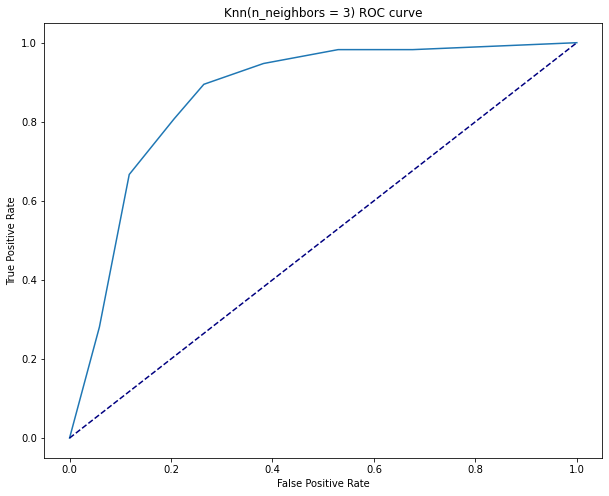

In [17]:
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Knn(n_neighbors = 3) ROC curve')

plt.show()

In [14]:
roc_auc_score(y_test, y_pred_proba)

0.8666150670794633

## 2. Precision-Recall Curve (PRC)

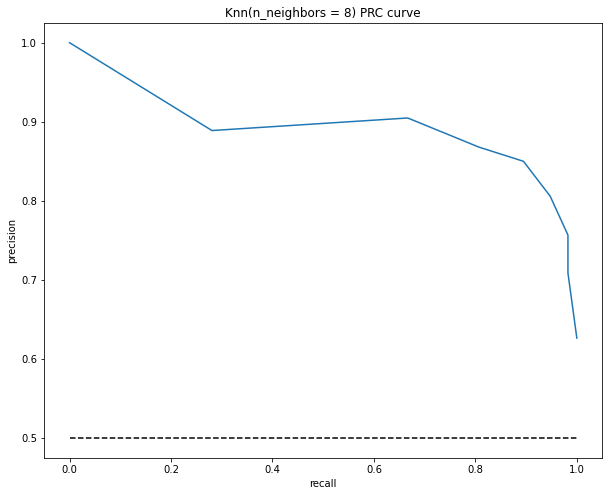

In [15]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

In [16]:
# calculate precision-recall AUC
auc_prc = auc(recall, precision)
print(auc_prc)

0.8937039687211308
